<a href="https://colab.research.google.com/github/sankalpbhatia2003/Speech-Emotion-Analyzer/blob/master/another_emotion_speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [48]:
from keras import regularizers
import os

In [49]:
mylist= os.listdir("/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_01")

In [50]:
type(mylist)

list

In [51]:
print(mylist)

['03-01-06-01-01-01-01.wav', '03-01-03-01-01-02-01.wav', '03-01-04-01-02-02-01.wav', '03-01-05-01-01-01-01.wav', '03-01-01-01-01-01-01.wav', '03-01-05-02-01-02-01.wav', '03-01-05-02-02-01-01.wav', '03-01-05-02-02-02-01.wav', '03-01-02-01-01-02-01.wav', '03-01-05-01-01-02-01.wav', '03-01-02-01-01-01-01.wav', '03-01-04-01-01-01-01.wav', '03-01-04-01-02-01-01.wav', '03-01-01-01-01-02-01.wav', '03-01-03-01-02-01-01.wav', '03-01-06-01-01-02-01.wav', '03-01-04-02-01-02-01.wav', '03-01-04-01-01-02-01.wav', '03-01-02-02-02-01-01.wav', '03-01-05-01-02-01-01.wav', '03-01-06-01-02-02-01.wav', '03-01-02-02-01-01-01.wav', '03-01-03-01-02-02-01.wav', '03-01-02-02-01-02-01.wav', '03-01-01-01-02-01-01.wav', '03-01-03-02-01-02-01.wav', '03-01-06-01-02-01-01.wav', '03-01-04-02-02-02-01.wav', '03-01-01-01-02-02-01.wav', '03-01-03-02-02-02-01.wav', '03-01-02-01-02-01-01.wav', '03-01-05-01-02-02-01.wav', '03-01-04-02-02-01-01.wav', '03-01-03-02-02-01-01.wav', '03-01-03-02-01-01-01.wav', '03-01-04-02-01-01-

In [52]:
data, sampling_rate = librosa.load("/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav")

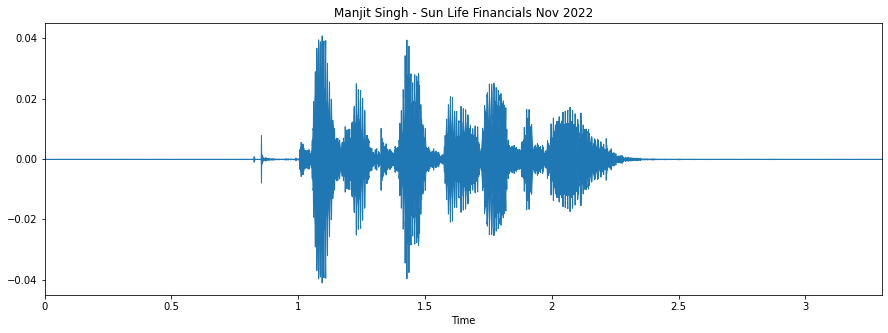

In [53]:
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
plt.title("Manjit Singh - Sun Life Financials Nov 2022")
librosa.display.waveplot(data, sr=sampling_rate)

<ipython-input-54-a039fc7eaddb>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr,x = scipy.io.wavfile.read("/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav")
<ipython-input-54-a039fc7eaddb>:26: RuntimeWarning: divide by zero encountered in log
  X[i,:] = np.log(np.abs(z[:nfft//2]))


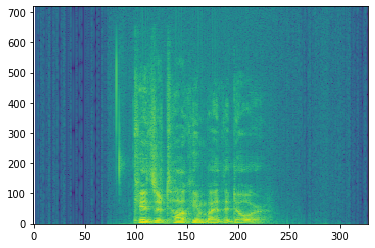

In [54]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read("/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav")

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

## will take windows x[n1:n2].  generate
## and loop over n2 such that all frames
## fit within the waveform
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [55]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
    #elif item[:1]=='n':
        #feeling_list.append('neutral')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')

In [56]:
labels = pd.DataFrame(feeling_list)

In [57]:
labels[:10]

,0
0,male_fearful
1,male_happy
2,male_sad
3,male_angry
4,male_angry
5,male_angry
6,male_angry
7,male_calm
8,male_angry
9,male_calm


In [58]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load("/content/drive/MyDrive/Voice Training Data /audio_speech_actors_01-24/Actor_01/"+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),
                        axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1        

In [59]:
df[:5]

,feature
0,"[-45.032272, -46.783333, -47.775944, -45.63865..."
1,"[-60.36923, -60.083897, -60.978966, -60.952496..."
2,"[-68.0494, -68.0494, -68.0494, -68.0494, -68.0..."
3,"[-55.507534, -55.729652, -55.71684, -55.83593,..."
4,"[-42.10482, -42.230606, -44.16868, -43.173862,..."


In [60]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [61]:
newdf = pd.concat([df3,labels], axis=1)

In [62]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [63]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-45.032272,-46.783333,-47.775944,-45.638657,-45.101887,-48.043533,-48.737442,-48.717079,-49.199280,-49.100506,...,-56.839233,-54.096859,-53.427769,-59.046432,-57.350243,-58.454796,-59.379673,-60.010906,-60.010906,male_fearful
1,-60.369228,-60.083897,-60.978966,-60.952496,-60.982536,-60.983990,-60.981300,-60.981300,-60.981300,-60.249794,...,-49.848812,-49.633385,-55.103004,-55.482151,-52.952621,-51.402016,-54.073372,-52.639961,-52.664593,male_happy
2,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,...,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,male_sad
3,-55.507534,-55.729652,-55.716839,-55.835930,-55.932114,-55.932114,-55.932114,-55.932114,-55.932114,-55.932114,...,-42.141296,-42.019539,-41.471268,-42.716209,-45.725437,-47.005997,-48.263088,-51.830585,-52.758736,male_angry
4,-42.104820,-42.230606,-44.168678,-43.173862,-43.591530,-42.570889,-43.202145,-43.710678,-43.444180,-43.015846,...,-22.873741,-20.374416,-17.856462,-16.366428,-14.621313,-18.455233,-21.158497,-10.561415,-3.888040,male_angry


In [64]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
23,-59.449753,-60.976311,-62.336704,-62.336704,-62.336704,-61.445114,-62.336704,-62.336704,-62.336483,-62.336704,...,-61.328335,-61.667904,-59.325424,-60.375389,-61.390007,-62.336704,-62.319641,-59.313339,-60.265671,male_fearful
34,-69.051476,-69.051476,-69.051476,-69.051476,-69.051476,-68.755074,-69.051476,-69.051476,-69.051476,-68.359322,...,-57.682072,-56.301693,-58.650566,-63.881496,-63.749794,-65.222809,-65.308594,-67.008865,-68.636490,male_calm
39,-37.498199,-40.120876,-41.299171,-42.205261,-42.010677,-42.346931,-41.992271,-40.100216,-38.743668,-38.762974,...,-23.336887,-23.642170,-24.690920,-27.676052,-29.822895,-30.354042,-30.983870,-29.850712,-29.778206,male_fearful
0,-45.032272,-46.783333,-47.775944,-45.638657,-45.101887,-48.043533,-48.737442,-48.717079,-49.199280,-49.100506,...,-56.839233,-54.096859,-53.427769,-59.046432,-57.350243,-58.454796,-59.379673,-60.010906,-60.010906,male_fearful
36,-43.197578,-44.238483,-43.996147,-44.132103,-44.267784,-44.346001,-44.142799,-44.255032,-43.666386,-43.591404,...,-33.477657,-33.367554,-32.960381,-31.951490,-31.074728,-31.176338,-30.759197,-19.878183,-12.398180,male_fearful
17,-55.663250,-56.170654,-56.158165,-54.663876,-55.167160,-56.157265,-56.157265,-56.157265,-56.157265,-56.157265,...,-56.157265,-56.157265,-56.157265,-55.844578,-56.157265,-56.157265,-56.157265,-56.157265,-56.157265,male_angry
33,-42.992100,-42.992100,-42.846359,-42.268284,-40.690666,-40.163750,-40.072525,-42.604244,-41.733459,-41.411289,...,-28.351170,-25.096415,-22.967365,-23.114470,-23.476543,-21.693007,-22.077486,-18.636705,-16.158962,male_angry
14,-62.104954,-62.104954,-62.104954,-62.038120,-62.104954,-62.104954,-62.104954,-62.104954,-62.104954,-62.104954,...,-60.358253,-61.090824,-62.026714,-61.804924,-61.251534,-59.135971,-61.460106,-62.104954,-62.104954,male_sad
7,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-65.240265,-65.536674,-67.557671,-67.557671,...,-57.271206,-56.744106,-56.141361,-57.532471,-59.493530,-67.150169,-67.499031,-66.086861,-66.205429,male_calm
5,-49.198429,-48.963985,-49.051529,-49.020500,-49.043743,-49.089008,-47.905560,-47.956844,-48.153133,-48.783493,...,-19.783306,-19.593184,-19.809538,-21.997786,-21.924906,-23.150219,-23.046072,-20.907570,-19.264782,male_angry


In [65]:
rnewdf=rnewdf.fillna(0)

**Dividing the data into test and train**

In [66]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [67]:
train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
23,-59.449753,-60.976311,-62.336704,-62.336704,-62.336704,-61.445114,-62.336704,-62.336704,-62.336483,-62.336704,...,-61.328335,-61.667904,-59.325424,-60.375389,-61.390007,-62.336704,-62.319641,-59.313339,-60.265671,male_fearful
34,-69.051476,-69.051476,-69.051476,-69.051476,-69.051476,-68.755074,-69.051476,-69.051476,-69.051476,-68.359322,...,-57.682072,-56.301693,-58.650566,-63.881496,-63.749794,-65.222809,-65.308594,-67.008865,-68.636490,male_calm
39,-37.498199,-40.120876,-41.299171,-42.205261,-42.010677,-42.346931,-41.992271,-40.100216,-38.743668,-38.762974,...,-23.336887,-23.642170,-24.690920,-27.676052,-29.822895,-30.354042,-30.983870,-29.850712,-29.778206,male_fearful
0,-45.032272,-46.783333,-47.775944,-45.638657,-45.101887,-48.043533,-48.737442,-48.717079,-49.199280,-49.100506,...,-56.839233,-54.096859,-53.427769,-59.046432,-57.350243,-58.454796,-59.379673,-60.010906,-60.010906,male_fearful
36,-43.197578,-44.238483,-43.996147,-44.132103,-44.267784,-44.346001,-44.142799,-44.255032,-43.666386,-43.591404,...,-33.477657,-33.367554,-32.960381,-31.951490,-31.074728,-31.176338,-30.759197,-19.878183,-12.398180,male_fearful
17,-55.663250,-56.170654,-56.158165,-54.663876,-55.167160,-56.157265,-56.157265,-56.157265,-56.157265,-56.157265,...,-56.157265,-56.157265,-56.157265,-55.844578,-56.157265,-56.157265,-56.157265,-56.157265,-56.157265,male_angry
33,-42.992100,-42.992100,-42.846359,-42.268284,-40.690666,-40.163750,-40.072525,-42.604244,-41.733459,-41.411289,...,-28.351170,-25.096415,-22.967365,-23.114470,-23.476543,-21.693007,-22.077486,-18.636705,-16.158962,male_angry
14,-62.104954,-62.104954,-62.104954,-62.038120,-62.104954,-62.104954,-62.104954,-62.104954,-62.104954,-62.104954,...,-60.358253,-61.090824,-62.026714,-61.804924,-61.251534,-59.135971,-61.460106,-62.104954,-62.104954,male_sad
7,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-67.557671,-65.240265,-65.536674,-67.557671,-67.557671,...,-57.271206,-56.744106,-56.141361,-57.532471,-59.493530,-67.150169,-67.499031,-66.086861,-66.205429,male_calm
5,-49.198429,-48.963985,-49.051529,-49.020500,-49.043743,-49.089008,-47.905560,-47.956844,-48.153133,-48.783493,...,-19.783306,-19.593184,-19.809538,-21.997786,-21.924906,-23.150219,-23.046072,-20.907570,-19.264782,male_angry


In [68]:
test

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
18,-63.523846,-63.523846,-63.523846,-63.523846,-63.523846,-63.377724,-61.596287,-63.160645,-63.523846,-63.523846,...,-39.848248,-40.466457,-40.448551,-42.883549,-43.368042,-46.280754,-48.274254,-49.745644,-50.473366,male_fearful
8,-55.624268,-55.624268,-55.570801,-53.939072,-52.901554,-54.381260,-54.381672,-55.479057,-55.612709,-55.889286,...,-31.432814,-33.775841,-36.061859,-38.142685,-38.785854,-39.644894,-41.592964,-45.737263,-42.882072,male_angry
12,-65.427750,-65.427750,-65.262238,-65.427750,-65.427750,-65.427750,-65.028061,-65.404816,-65.427750,-58.999565,...,-60.775871,-64.037216,-64.463974,-65.205452,-64.806198,-64.464417,-61.401047,-60.954880,-62.738766,male_happy
6,-40.796883,-40.789669,-40.808334,-40.876545,-40.619694,-40.420124,-40.692852,-40.931232,-40.967266,-40.788017,...,-21.875114,-24.762779,-29.518728,-27.211124,-16.296978,-15.058404,-19.382408,-19.939528,-16.054724,male_angry
13,-61.087765,-61.579689,-61.581135,-61.288517,-61.081558,-60.592163,-59.902767,-59.478203,-60.251793,-61.044437,...,-53.662632,-53.637329,-55.863945,-56.614754,-56.009781,-54.971310,-54.318119,-56.101624,-56.823063,male_fearful


In [69]:
train[24:34] #Earlier 250:260

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
22,-56.733604,-56.752377,-56.415298,-55.715714,-55.817928,-55.832840,-55.889671,-55.116646,-54.244915,-56.211960,...,-39.932251,-43.064877,-46.631859,-48.998745,-46.068241,-45.294621,-47.657753,-51.417564,-54.335529,male_happy
38,-35.373291,-36.900837,-38.971413,-38.443699,-37.651573,-38.045456,-38.625210,-42.541420,-43.463486,-43.102806,...,-29.332130,-27.650618,-31.415056,-34.811867,-34.607536,-35.441376,-35.538944,-36.478264,-35.934708,male_fearful
15,-67.736496,-67.778366,-66.746597,-65.958344,-67.736496,-67.736496,-67.736496,-67.259155,-67.736496,-67.736496,...,-61.116722,-63.291748,-65.844711,-65.121506,-59.515804,-59.591988,-66.712601,-67.736496,-67.736496,male_sad
37,-44.590401,-45.006592,-45.195656,-43.043945,-43.083050,-44.333244,-44.626606,-44.436020,-43.748173,-45.732674,...,-29.290974,-26.936699,-26.975965,-27.146627,-26.252871,-26.814348,-26.261763,-12.775722,-5.234003,male_fearful
19,-73.841858,-73.841858,-73.841858,-73.720078,-73.841858,-73.841858,-73.841858,-73.304192,-72.807358,-73.841858,...,-50.570267,-53.508461,-54.224915,-51.547527,-52.576477,-54.788902,-56.346535,-57.509991,-56.579109,male_calm
20,-65.243805,-65.243805,-65.243805,-65.243805,-65.243805,-65.243805,-65.243805,-65.243805,-65.243805,-65.118050,...,-61.924801,-56.157463,-55.678505,-61.118351,-58.569290,-57.137386,-58.620491,-60.068855,-57.351204,male_happy
24,-61.560810,-61.560810,-61.560810,-61.560810,-61.560810,-61.560810,-61.560810,-61.560810,-61.560810,-61.560810,...,-53.845036,-54.261051,-55.809509,-54.627609,-53.187302,-53.998699,-53.535618,-57.204185,-59.989414,male_sad
2,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,...,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,-68.049400,male_sad
3,-55.507534,-55.729652,-55.716839,-55.835930,-55.932114,-55.932114,-55.932114,-55.932114,-55.932114,-55.932114,...,-42.141296,-42.019539,-41.471268,-42.716209,-45.725437,-47.005997,-48.263088,-51.830585,-52.758736,male_angry
1,-60.369228,-60.083897,-60.978966,-60.952496,-60.982536,-60.983990,-60.981300,-60.981300,-60.981300,-60.249794,...,-49.848812,-49.633385,-55.103004,-55.482151,-52.952621,-51.402016,-54.073372,-52.639961,-52.664593,male_happy


In [70]:
trainfeatures = train.iloc[:, :-1]

In [71]:
trainlabel = train.iloc[:, -1:]

In [72]:
testfeatures = test.iloc[:, :-1]

In [73]:
trainlabel

,0
23,male_fearful
34,male_calm
39,male_fearful
0,male_fearful
36,male_fearful
17,male_angry
33,male_angry
14,male_sad
7,male_calm
5,male_angry


In [74]:
testfeatures

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
18,-63.523846,-63.523846,-63.523846,-63.523846,-63.523846,-63.377724,-61.596287,-63.160645,-63.523846,-63.523846,...,-39.336967,-39.848248,-40.466457,-40.448551,-42.883549,-43.368042,-46.280754,-48.274254,-49.745644,-50.473366
8,-55.624268,-55.624268,-55.570801,-53.939072,-52.901554,-54.381260,-54.381672,-55.479057,-55.612709,-55.889286,...,-33.353981,-31.432814,-33.775841,-36.061859,-38.142685,-38.785854,-39.644894,-41.592964,-45.737263,-42.882072
12,-65.427750,-65.427750,-65.262238,-65.427750,-65.427750,-65.427750,-65.028061,-65.404816,-65.427750,-58.999565,...,-59.589638,-60.775871,-64.037216,-64.463974,-65.205452,-64.806198,-64.464417,-61.401047,-60.954880,-62.738766
6,-40.796883,-40.789669,-40.808334,-40.876545,-40.619694,-40.420124,-40.692852,-40.931232,-40.967266,-40.788017,...,-23.363060,-21.875114,-24.762779,-29.518728,-27.211124,-16.296978,-15.058404,-19.382408,-19.939528,-16.054724
13,-61.087765,-61.579689,-61.581135,-61.288517,-61.081558,-60.592163,-59.902767,-59.478203,-60.251793,-61.044437,...,-56.197617,-53.662632,-53.637329,-55.863945,-56.614754,-56.009781,-54.971310,-54.318119,-56.101624,-56.823063


In [75]:
testlabel = test.iloc[:, -1:]

In [76]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
y_train

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1.

In [78]:
X_train.shape

(35, 216)

**Changing dimensions for CNN model**

In [79]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [80]:
x_traincnn

array([[[-59.449753],
        [-60.97631 ],
        [-62.336704],
        ...,
        [-62.31964 ],
        [-59.31334 ],
        [-60.26567 ]],

       [[-69.051476],
        [-69.051476],
        [-69.051476],
        ...,
        [-65.30859 ],
        [-67.008865],
        [-68.63649 ]],

       [[-37.4982  ],
        [-40.120876],
        [-41.29917 ],
        ...,
        [-30.98387 ],
        [-29.850712],
        [-29.778206]],

       ...,

       [[-55.507534],
        [-55.729652],
        [-55.71684 ],
        ...,
        [-48.26309 ],
        [-51.830585],
        [-52.758736]],

       [[-60.36923 ],
        [-60.083897],
        [-60.978966],
        ...,
        [-54.07337 ],
        [-52.63996 ],
        [-52.664593]],

       [[-70.74667 ],
        [-70.74667 ],
        [-70.0256  ],
        ...,
        [-40.284622],
        [-41.45613 ],
        [-44.38417 ]]], dtype=float32)

In [81]:
x_testcnn

array([[[-63.523846],
        [-63.523846],
        [-63.523846],
        ...,
        [-48.274254],
        [-49.745644],
        [-50.473366]],

       [[-55.624268],
        [-55.624268],
        [-55.5708  ],
        ...,
        [-41.592964],
        [-45.737263],
        [-42.882072]],

       [[-65.42775 ],
        [-65.42775 ],
        [-65.26224 ],
        ...,
        [-61.401047],
        [-60.95488 ],
        [-62.738766]],

       [[-40.796883],
        [-40.78967 ],
        [-40.808334],
        ...,
        [-19.382408],
        [-19.939528],
        [-16.054724]],

       [[-61.087765],
        [-61.57969 ],
        [-61.581135],
        ...,
        [-54.31812 ],
        [-56.101624],
        [-56.823063]]], dtype=float32)

In [82]:
print("x_traincnn shape: {}".format(x_traincnn.shape))

print("x_testcnn shape: {}".format(x_testcnn.shape))

x_traincnn shape: (35, 216, 1)
x_testcnn shape: (5, 216, 1)


In [83]:
from tensorflow import keras
#from keras import optimizers

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
#opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
opt = keras.optimizers.legacy.Adam(lr=0.00001, decay=1e-6)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [84]:
x_traincnn.shape

(35, 216, 1)

In [85]:
x_testcnn.shape

(5, 216, 1)

In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 216, 256)          1536      
                                                                 
 activation_5 (Activation)   (None, 216, 256)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 216, 128)          163968    
                                                                 
 activation_6 (Activation)   (None, 216, 128)          0         
                                                                 
 dropout_1 (Dropout)         (None, 216, 128)          0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 27, 128)          0         
 1D)                                                             
                                                      

In [87]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

**Removing training part to avoid long epochs list**

In [88]:
x_testcnn.shape

(5, 216, 1)

In [89]:
x_testcnn

array([[[-63.523846],
        [-63.523846],
        [-63.523846],
        ...,
        [-48.274254],
        [-49.745644],
        [-50.473366]],

       [[-55.624268],
        [-55.624268],
        [-55.5708  ],
        ...,
        [-41.592964],
        [-45.737263],
        [-42.882072]],

       [[-65.42775 ],
        [-65.42775 ],
        [-65.26224 ],
        ...,
        [-61.401047],
        [-60.95488 ],
        [-62.738766]],

       [[-40.796883],
        [-40.78967 ],
        [-40.808334],
        ...,
        [-19.382408],
        [-19.939528],
        [-16.054724]],

       [[-61.087765],
        [-61.57969 ],
        [-61.581135],
        ...,
        [-54.31812 ],
        [-56.101624],
        [-56.823063]]], dtype=float32)

In [90]:
x_testcnn

array([[[-63.523846],
        [-63.523846],
        [-63.523846],
        ...,
        [-48.274254],
        [-49.745644],
        [-50.473366]],

       [[-55.624268],
        [-55.624268],
        [-55.5708  ],
        ...,
        [-41.592964],
        [-45.737263],
        [-42.882072]],

       [[-65.42775 ],
        [-65.42775 ],
        [-65.26224 ],
        ...,
        [-61.401047],
        [-60.95488 ],
        [-62.738766]],

       [[-40.796883],
        [-40.78967 ],
        [-40.808334],
        ...,
        [-19.382408],
        [-19.939528],
        [-16.054724]],

       [[-61.087765],
        [-61.57969 ],
        [-61.581135],
        ...,
        [-54.31812 ],
        [-56.101624],
        [-56.823063]]], dtype=float32)

In [91]:
x_testcnn.shape

(5, 216, 1)

In [92]:
y_test.shape

(5, 3)

In [93]:
y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [94]:
y_test.shape

(5, 3)

In [95]:
model

In [96]:
print("x_testcnn shape: {}".format(x_testcnn.shape))
print("y_test shape: {}".format(y_test.shape))

x_testcnn shape: (5, 216, 1)
y_test shape: (5, 3)


In [97]:
cnnhistory = model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

Epoch 1/700


ValueError: ignored

In [87]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

**Saving the Model**

In [51]:
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Emotion_Voice_Detection_Model.h5 


In [52]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

**Load the model**

In [53]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


ValueError: ignored

**Predicting emotions on the test dataset**

In [97]:
preds = loaded_model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

NameError: ignored

In [ ]:
preds

In [ ]:
preds1=preds.argmax(axis=1)

In [ ]:
preds1

In [ ]:
abc = preds1.astype(int).flatten()

In [ ]:
predictions = (lb.inverse_transform((abc)))

In [ ]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

In [ ]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [ ]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

In [ ]:
finaldf = actualdf.join(preddf)

**Actual vs Predicted Emotions**

In [ ]:
finaldf[170:180]

In [ ]:
finaldf.groupby('actualvalues').count()

In [ ]:
finaldf.groupby('predictedvalues').count()

In [ ]:
finaldf.to_csv('Predictions.csv', index=False)

**Predicting emotions for Sun Life Financials**

In [ ]:
data, sampling_rate = librosa.load('output10.wav') # change the .wav file

In [ ]:
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [ ]:
#livedf= pd.DataFrame(columns=['feature'])
X, sample_rate = librosa.load('output10.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive

In [ ]:
livedf2= pd.DataFrame(data=livedf2)

In [ ]:
livedf2= pd.DataFrame(data=livedf2)

In [ ]:
livedf2

In [ ]:
twodim= np.expand_dims(livedf2, axis=2)

In [ ]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

In [ ]:
livepreds

In [ ]:
livepreds1=livepreds.argmax(axis=1)

In [ ]:
liveabc = livepreds1.astype(int).flatten()

In [ ]:
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions